In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from census import Census

from citipy import citipy
from config import api_key

# # Read the mass shootings file and store into Pandas DataFrames
mass_shoot_df = pd.read_csv("Resources/mass_shootings_complete.csv")
mass_shoot_df = mass_shoot_df.dropna()
mass_shoot_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4
...,...,...,...,...,...,...,...
3763,2201641,1-Jan-22,Wisconsin,Kenosha,1708 52nd St,1,3
3764,2202001,1-Jan-22,Illinois,Peoria,2000 block of SW Adams St,2,2
3765,2201876,1-Jan-22,South Carolina,Dillon,3261 Hwy 9,0,5
3766,2201848,1-Jan-22,Indiana,South Bend,1500 block of S Miami St,0,4


# **Mass Shootings Summary for the last 8 years (Julie)** 

Have the rates of mass shootings increased within the last 8 years?


In [2]:
# Count total incidents per State
state_count = mass_shoot_df["State"].value_counts()
state_count

Illinois                391
California              327
Texas                   257
Florida                 220
Pennsylvania            181
New York                176
Louisiana               169
Ohio                    147
Georgia                 140
Maryland                119
Michigan                117
Missouri                117
Tennessee               113
North Carolina          112
Alabama                 102
South Carolina           95
Virginia                 89
New Jersey               87
Indiana                  77
Mississippi              72
District of Columbia     59
Colorado                 58
Wisconsin                51
Minnesota                48
Arizona                  46
Kentucky                 44
Washington               42
Arkansas                 42
Massachusetts            30
Oklahoma                 28
Connecticut              27
Nevada                   27
Kansas                   22
New Mexico               22
Oregon                   20
Delaware            

In [3]:
state_count_df = pd.DataFrame(state_count)
state_count_df

,State
Illinois,391
California,327
Texas,257
Florida,220
Pennsylvania,181
New York,176
Louisiana,169
Ohio,147
Georgia,140
Maryland,119


<BarContainer object of 49 artists>

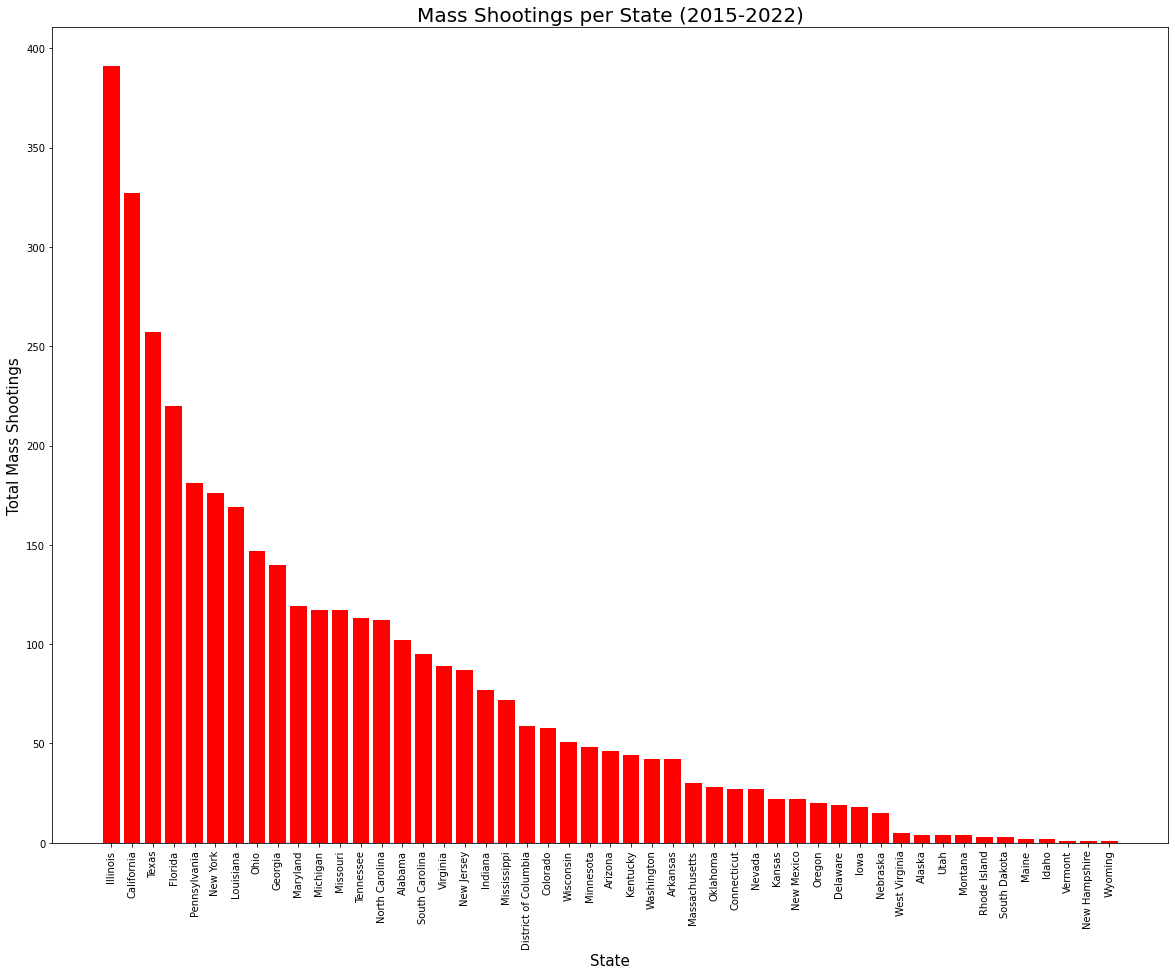

In [4]:
# Create a bar chart with mass shootings per state
fig, ax = plt.subplots(figsize=(20,15))

x_axis = state_count.index.values
y_axis = state_count.values
per_state_chart = ax.bar(x_axis, y_axis, color='red', align="center", width = 0.8)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Total Mass Shootings", fontsize = 15)
plt.title("Mass Shootings per State (2015-2022)", fontsize = 20)
plt.xticks(rotation="vertical")

plt.savefig("output_data/Fig1.png")

per_state_chart

In [5]:
# Calculate how many incidents happened in different cities
mass_shoot_by_city = mass_shoot_df["City Or County"].value_counts()
mass_shoot_by_city_df = pd.DataFrame(mass_shoot_by_city)
mass_shoot_by_city_df

,City Or County
Chicago,289
Philadelphia,128
Baltimore,82
Houston,72
New Orleans,61
...,...
Federal Way,1
Paulsboro,1
Valley Village,1
Blakely,1


In [6]:
# Create a bar chart visualizing total incidents per city 
#fig, ax = plt.subplots(figsize=(20,15))

#x_axis = mass_shoot_by_city.index.values
#y_axis = mass_shoot_by_city.values
#per_state_chart = ax.bar(x_axis, y_axis, color='green', align="center", width = 0.8)
#plt.xlabel("City or County", fontsize = 15)
#plt.ylabel("Total Mass Shootings", fontsize = 15)
#plt.title("Mass Shootings per State (2015-2022)", fontsize = 20)
#plt.xticks(rotation="vertical")

In [7]:
# Creating a separate column to store Year
mass_shoot_df["Year"] = pd.to_datetime(mass_shoot_df["Incident Date"]).dt.year
mass_shoot_df.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Year
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4,2015
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4,2015
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4,2015
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4,2015


In [8]:
# Calculate the total number of mass shootings each year 
mass_shootings_2015 = mass_shoot_df[mass_shoot_df["Year"] == 2015]
mass_shootings_2016 = mass_shoot_df[mass_shoot_df["Year"] == 2016]
mass_shootings_2017 = mass_shoot_df[mass_shoot_df["Year"] == 2017]
mass_shootings_2018 = mass_shoot_df[mass_shoot_df["Year"] == 2018]
mass_shootings_2019 = mass_shoot_df[mass_shoot_df["Year"] == 2019]
mass_shootings_2020 = mass_shoot_df[mass_shoot_df["Year"] == 2020]
mass_shootings_2021 = mass_shoot_df[mass_shoot_df["Year"] == 2021]
mass_shootings_2022 = mass_shoot_df[mass_shoot_df["Year"] == 2022]

total_2015 = mass_shootings_2015["Year"].value_counts()
total_2016 = mass_shootings_2016["Year"].value_counts()
print(total_2015)
print(total_2016)

2015    335
Name: Year, dtype: int64
2016    383
Name: Year, dtype: int64


In [9]:
# Create a dataframe to store number of incidents per year
mass_shoot_by_year = mass_shoot_df["Year"].value_counts()
mass_shoot_by_year_df = pd.DataFrame(mass_shoot_by_year)
mass_shoot_by_year_df

,Year
2021,688
2022,641
2020,609
2019,417
2016,383
2017,348
2015,335
2018,335


**Bar chart: Mass Shootings per year**

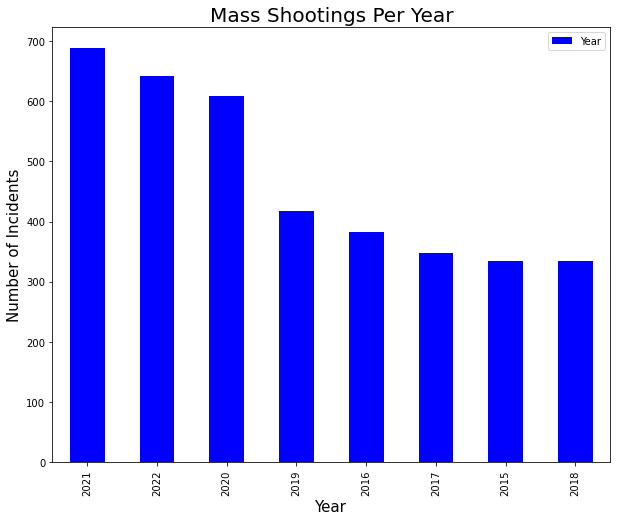

In [10]:
# Create a bar chart to display Total Mass Shootings per year
bar_chart_per_year = mass_shoot_by_year_df.plot(kind="bar", color="blue", figsize =(10,8))
bar_chart_per_year.set_title("Mass Shootings Per Year", fontsize = 20)
bar_chart_per_year.set_xlabel("Year", fontsize = 15)
bar_chart_per_year.set_ylabel("Number of Incidents", fontsize = 15)
bar_chart_per_year

**Scatter Plot/Line Chart: mass shootings per season** 

In [11]:
# Calculate the total number of mass shootings per season/month

In [12]:
# Calculate the total number of mass shootings per state (each year)

In [13]:
# Visualize data on red/blue state vs. total number of mass shootings (API call? hvplot.pandas?)

In [14]:
# Calculate the total number of mass shootings per state each year (per one million people)

**Map: Total Number of Mass Shootings per State (points of different sizes)**

# **Census Data vs. Mass Shootings Data (Nancy)**

Does local poverty rate/lower median family income contribute to greater prevelance of mass shootings in the US? 

In [29]:
# API Call to get Cencus Data (population) by State 

c = Census(
    api_key,
    year = 2020
)

census_data = c.acs5.get(
    ("NAME",
     "B01003_001E", 
     "B19013_001E",
     "B19301_001E",
     "B17001_002E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.head()

,NAME,B01003_001E,B19013_001E,B19301_001E,B17001_002E,state
0,Pennsylvania,12794885.0,63627.0,35518.0,1480430.0,42
1,California,39346023.0,78672.0,38576.0,4853434.0,06
2,West Virginia,1807426.0,48037.0,27346.0,300152.0,54
3,Utah,3151239.0,74197.0,30986.0,283360.0,49
4,New York,19514849.0,71117.0,40898.0,2581048.0,36


In [30]:
# Rename columns
cencus_data_complete = census_pd.rename(columns={
    "NAME": "State",
    "B01003_001E": "Population",
    "B19013_001E": "Household Income",
    "B19301_001E": "Per Capita Income",
    "B17001_002E": "Poverty Count"
})
cencus_data_complete.head()

,State,Population,Household Income,Per Capita Income,Poverty Count,state
0,Pennsylvania,12794885.0,63627.0,35518.0,1480430.0,42
1,California,39346023.0,78672.0,38576.0,4853434.0,06
2,West Virginia,1807426.0,48037.0,27346.0,300152.0,54
3,Utah,3151239.0,74197.0,30986.0,283360.0,49
4,New York,19514849.0,71117.0,40898.0,2581048.0,36


In [ ]:
# Convert the poverty rate data into a Pandas DataFrame

In [ ]:
# Sort the ______ by `______` in ascending order.

**Scatter Plot (hvplot.pandas): City vs. Mass shootings** 

**Pie Chart: Total Mass shootings vs. Poverty rate/Income**

# Mass Shooting vs. Gun Violence (%) (Isidore)

What percentage of gun violence is related/from Mass Shootings? 

# **Guns Laws vs. Mass Shootings (Leah)**

Do strict gun laws prevent mass shooting?

In [ ]:
# Extract ranking for stricter gun laws 